In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Raw data 불러오기

df = pd.read_csv(r"C:\Users\wldnr\OneDrive\바탕 화면/vgames2.csv")

df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
## Objective 1 : Data cleansing

In [4]:
#'Unnamed: 0' columns 삭제

df = df.drop(columns = 'Unnamed: 0')

In [5]:
#결측값 확인 및 삭제

df.isnull().sum()

df = df.dropna(axis = 0)

In [6]:
#Sales_data의 단위 'M', 'K' 를 포함한 행 삭제

drop_str = ['M','K']

df = df[~df['NA_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_str))]

In [7]:
#numeric_data로 변환

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

In [8]:
##모든 지역의 Sales_data를 합한 Total_Sales columns 추가

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [9]:
#'Year' columns 의 4자리 숫자가 아닌 년도 4자리 년도로 변환

def to_year(x) :
    if (x >= 0) & (x <= 22) :
        return int(2000 + x)
    if (x > 22) & (x < 1000) :
        return int(1900 + x)
    else :
        return x
    
df['Year'] = df['Year'].apply(to_year)
df['Year'] = df['Year'].astype(int)

In [10]:
#'_Sales' columns 의 data 중 100을 초과하는

In [11]:
#duplicated data 확인

df.duplicated().sum()

0

In [12]:
## Objective 2 : Data 정보 확인

In [13]:
#Data 확인

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344,0.536206
std,5.834873,0.824188,0.510354,0.309821,0.192612,1.570285
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.472500
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [15]:
#각 columns('Platform, Year, Genre, Publisher')의 그룹 확인

name_Platform = df['Platform'].unique()
name_Year = df['Year'].unique()
name_Genre = df['Genre'].unique()
name_Publisher = df['Publisher'].unique()

print(len(name_Platform))
print('Platform :', name_Platform)

print(len(name_Year))
print('Year :', name_Year)

print(len(name_Genre))
print('Genre :', name_Genre)

print(len(name_Publisher))
print('Publisher :', name_Publisher)

31
Platform : ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'GBA' 'PS4' 'PS2' 'PS' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
38
Year : [2008 2009 2010 2005 2011 2007 2003 2006 2014 2015 2002 1997 2013 1996
 2004 2000 1984 1998 2001 2016 1985 1999 1995 1993 2012 1987 1982 1994
 1990 1992 1991 1983 1988 1981 1989 1986 2017 1980]
12
Genre : ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Racing' 'Shooter']
564
Publisher : ['Destineer' 'Namco Bandai Games' 'Alchemist' 'Zoo Games' 'D3Publisher'
 'Konami Digital Entertainment' 'Deep Silver' 'Tecmo Koei' 'Sega' 'THQ'
 'Ubisoft' 'Paradox Interactive' '505 Games' 'Tomy Corporation'
 'Eidos Interactive' 'Microsoft Game Studios' 'Nippon Ichi Software'
 'Kalypso Media' 'Electronic Arts' 'Sony Computer Entertainment'
 'Activision' 'Tru Blu Entertainment'
 'Warner Bros. Interactive Entertainment' 'Midway Games' 'M

In [16]:
## Objective 3 : 지역에 따른 선호 게임 Genre 파악

In [17]:
#지역별 Genre 에 따른 Sales dataset 생성

df_G_T = df.groupby(by = ['Genre'])['Total_Sales'].sum()
df_G_NA = df.groupby(by = ['Genre'])['NA_Sales'].sum()
df_G_EU = df.groupby(by = ['Genre'])['EU_Sales'].sum()
df_G_JP = df.groupby(by = ['Genre'])['JP_Sales'].sum()
df_G_Ot = df.groupby(by = ['Genre'])['Other_Sales'].sum()

df_G_list = [df_G_T, df_G_NA, df_G_EU, df_G_JP, df_G_Ot] #여러개의 dataframe 합치기 전 list로 묶기
df_Genre = pd.concat(df_G_list, axis = 1)

df_Genre

,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,1619.59,804.68,487.72,150.70,176.49
Adventure,224.14,97.75,60.99,49.28,16.12
Fighting,422.44,210.75,94.36,82.95,34.38
Misc,751.42,380.80,200.61,99.94,70.07
Platform,770.59,413.88,185.34,123.19,48.18
Puzzle,237.39,118.97,50.03,56.21,12.18
Racing,684.01,335.27,223.48,51.50,73.76
Role-Playing,836.13,295.54,166.88,320.83,52.88
Shooter,975.46,546.92,294.28,37.19,97.07


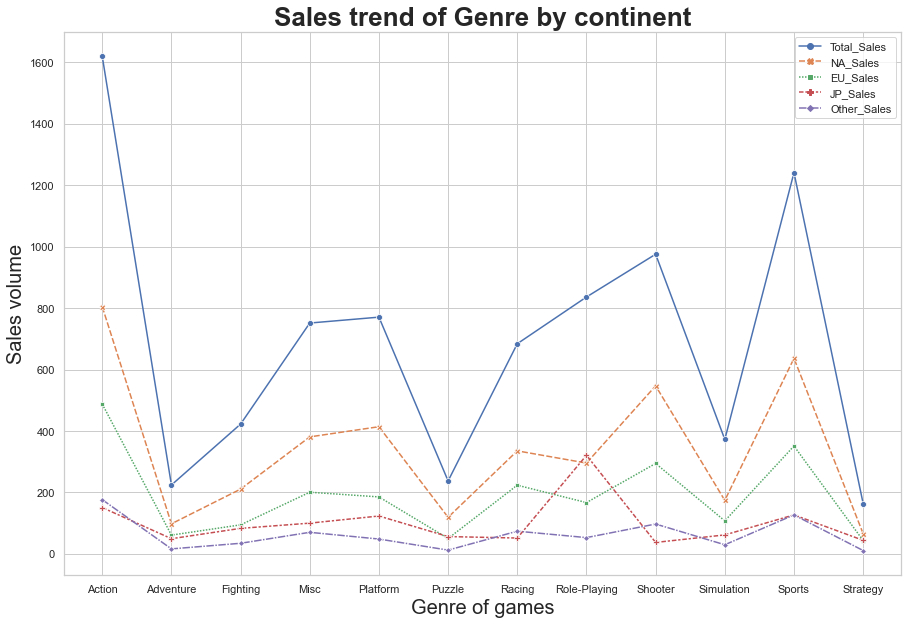

In [18]:
#data 시각화 : 지역별 Genre 에 따른 Sales dataset

sns.set(style = 'whitegrid')
plt.figure(figsize = (15, 10))
plt.xlabel('Genre of games', fontsize = 20)
plt.ylabel('Sales volume', fontsize = 20)
plt.title('Sales trend of Genre by continent', fontsize = 26, fontweight = 'bold')

sns.lineplot(data = df_Genre, markers = True);

In [19]:
## Objective 4 : 연도별 게임 트렌드 파악

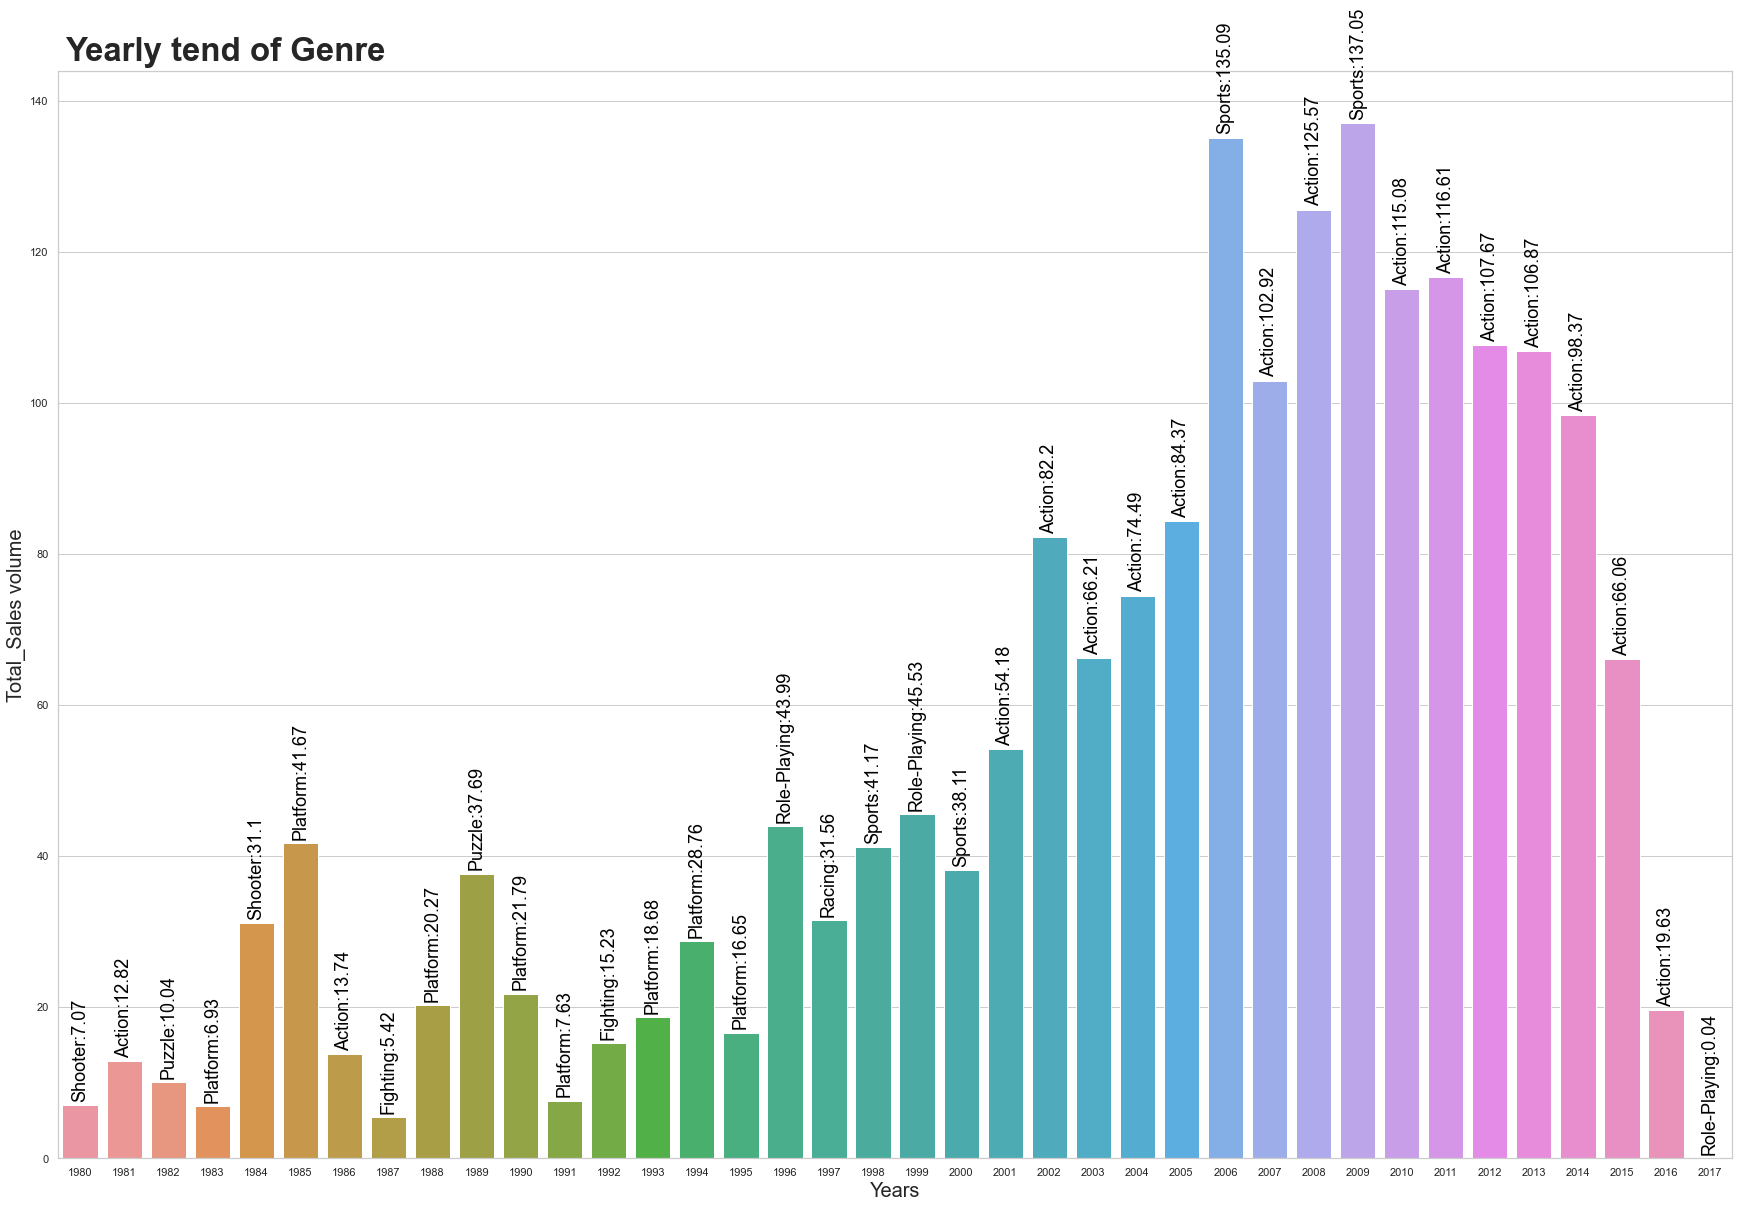

In [20]:
#연도별 Sales 총 량 과 가장 판매량이 높은 게임 Genre 에 대한 시각화

df_G_Year = df.groupby(by = ['Year', 'Genre'])['Total_Sales'].sum().reset_index()
df_Year = df_G_Year.groupby(by = ['Year'])['Total_Sales'].transform(max) == df_G_Year['Total_Sales']
df_Year_M = df_G_Year[df_Year].reset_index(drop = True)
Genre = df_Year_M['Genre']

plt.figure(figsize = (30, 20))
Plot_Genre = sns.barplot(x = 'Year', y = 'Total_Sales', data = df_Year_M)

index = 0
for i in df_Year_M['Total_Sales'] :
    Plot_Genre.text(index, i + 1, str(Genre[index] + ':' + str(round(i, 2))), color = '#000', size = 18, rotation = 90, ha = 'center')
    index += 1
    
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Total_Sales volume', fontsize = 20)
plt.title('Yearly tend of Genre', position = (0.1, 0), pad = 10, fontsize = 33, fontweight = 'bold')

plt.show()

In [21]:
#역대 가장 판매량이 높았던 상위 20개 Game의 판매년도 내림차순 정렬

df_sort = df.sort_values(by = ['Total_Sales'], ascending = False)

df_Bestseller_Year = df_sort.head(20)
df_Bestseller_Year = df_Bestseller_Year[['Name', 'Year', 'Genre', 'Total_Sales']]
df_Bestseller_Year = df_Bestseller_Year.sort_values(by = ['Year'], ascending = False)
df_Bestseller_Year = df_Bestseller_Year.reset_index(drop = True)

df_Bestseller_Year

,Name,Year,Genre,Total_Sales
0,Grand Theft Auto V,2013,Action,21.39
1,Kinect Adventures!,2010,Misc,21.82
2,Wii Sports Resort,2009,Sports,33.00
3,New Super Mario Bros. Wii,2009,Platform,28.61
4,Wii Fit Plus,2009,Sports,22.00
5,Mario Kart Wii,2008,Racing,35.83
6,Wii Fit,2007,Sports,22.72
7,Wii Sports,2006,Sports,82.74
8,New Super Mario Bros.,2006,Platform,30.01
9,Wii Play,2006,Misc,29.01


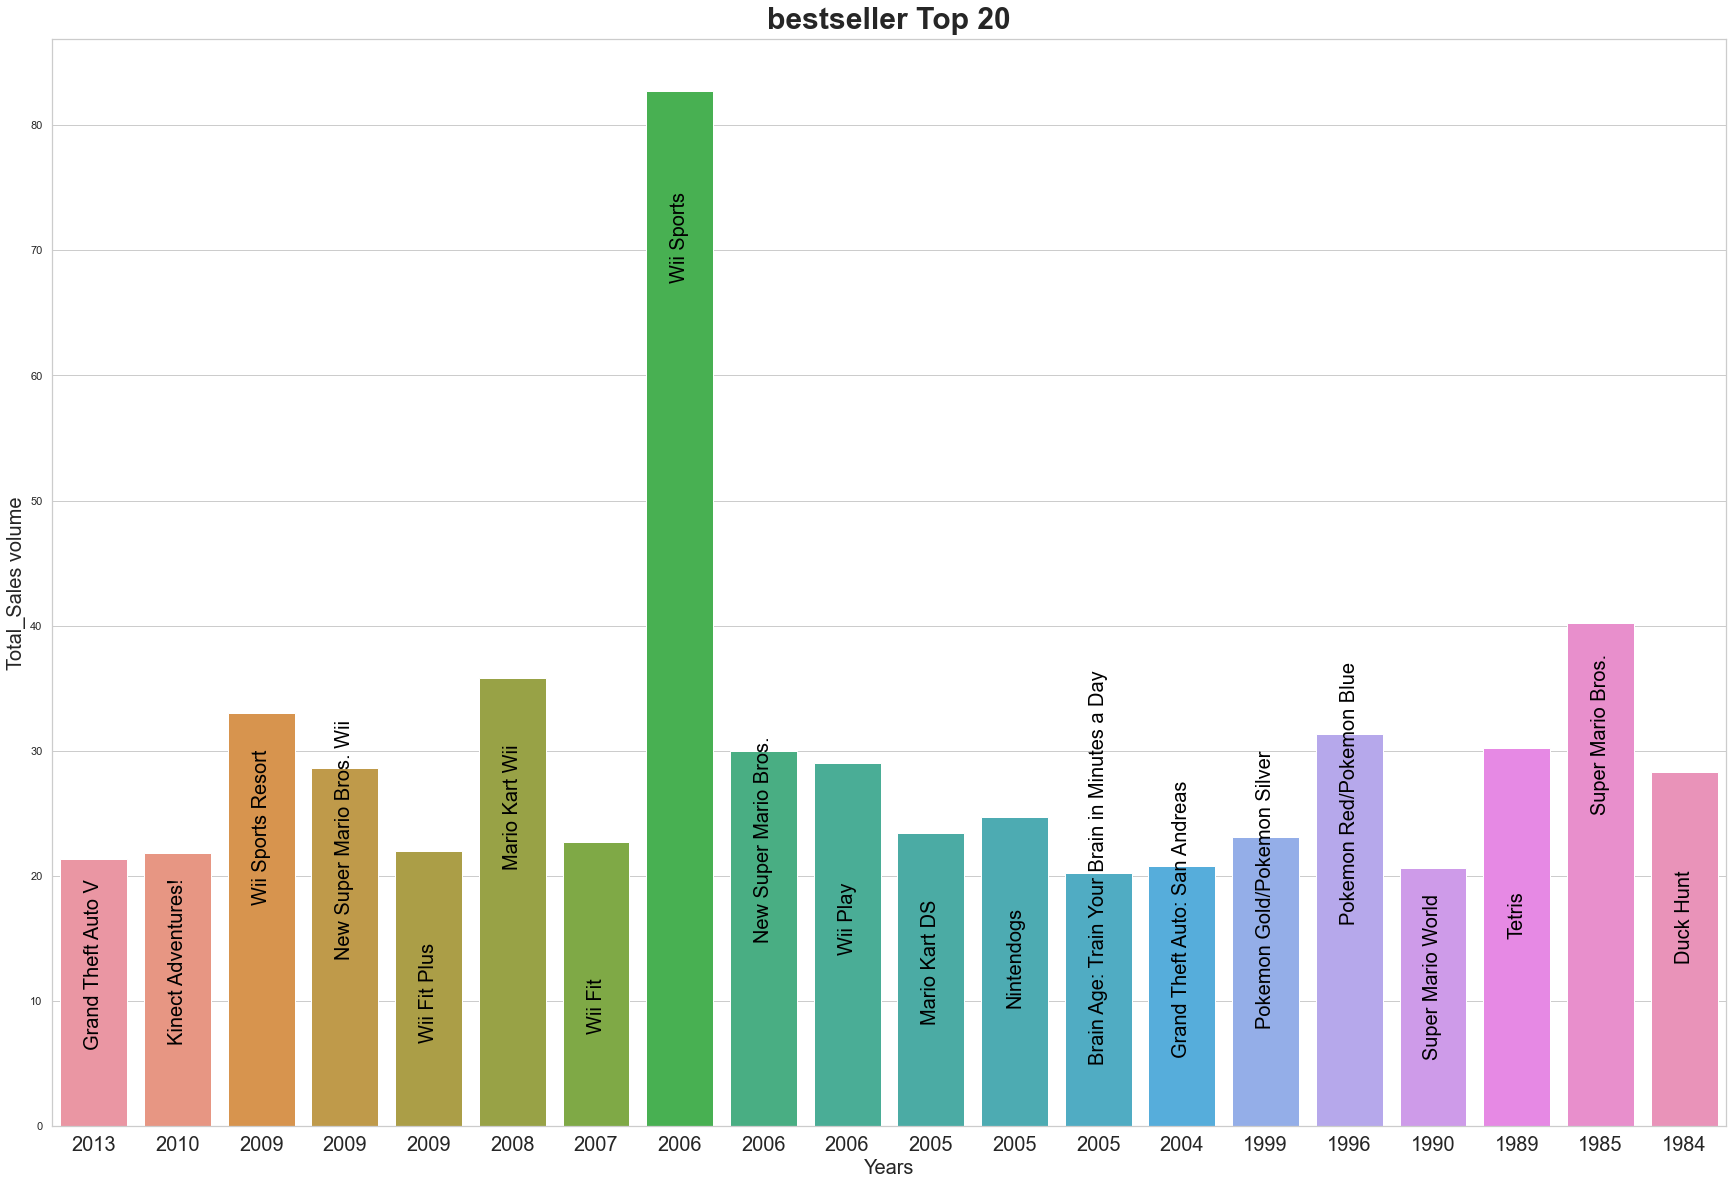

In [22]:
#역대 판매량이 높은 상위 20개 Game 에 대한 시각화

Name = df_Bestseller_Year['Name'].head(20)
Year = df_Bestseller_Year['Year'].head(20)
y = np.arange(0,20)

plt.figure(figsize = (30, 20))
Plot_Game = sns.barplot(x = 'Name', y = 'Total_Sales', data = df_Bestseller_Year)
index = 0
for i in df_Bestseller_Year['Total_Sales'] :
    Plot_Game.text(index, i - 15, Name[index], color = '#000', size = 20, rotation = 90, ha = 'center')
    index += 1

plt.xticks(y, df_Bestseller_Year['Year'], fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Total_Sales volume', fontsize = 20)
plt.title('bestseller Top 20', fontsize = 30, fontweight = 'bold', pad = 10)

plt.show()

In [23]:
#최신 출시 게임 중 판매량이 높은 상위 20개 Game의 판매량 순 정렬
#게임의 수요가 많아지고 Action Genre가 최고판매량을 기록하기 시작한 2001년도 부터
#최신 Trend를 가진 게임 선별

df_sort2 = df.sort_values(by = ['Year'], ascending = False)

df_Bestseller_Game = df_sort2[df_sort2.Year > 2000]
df_Bestseller_Game = df_Bestseller_Game[['Name', 'Year', 'Genre', 'Total_Sales']]
df_Bestseller_Game = df_Bestseller_Game.sort_values(by = ['Total_Sales'], ascending = False)
df_Bestseller_Game = df_Bestseller_Game.head(20)
df_Bestseller_Game = df_Bestseller_Game.reset_index(drop = True)

df_Bestseller_Game

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Mario Kart Wii,2008,Racing,35.83
2,Wii Sports Resort,2009,Sports,33.00
3,New Super Mario Bros.,2006,Platform,30.01
4,Wii Play,2006,Misc,29.01
5,New Super Mario Bros. Wii,2009,Platform,28.61
6,Nintendogs,2005,Simulation,24.75
7,Mario Kart DS,2005,Racing,23.43
8,Wii Fit,2007,Sports,22.72
9,Wii Fit Plus,2009,Sports,22.00


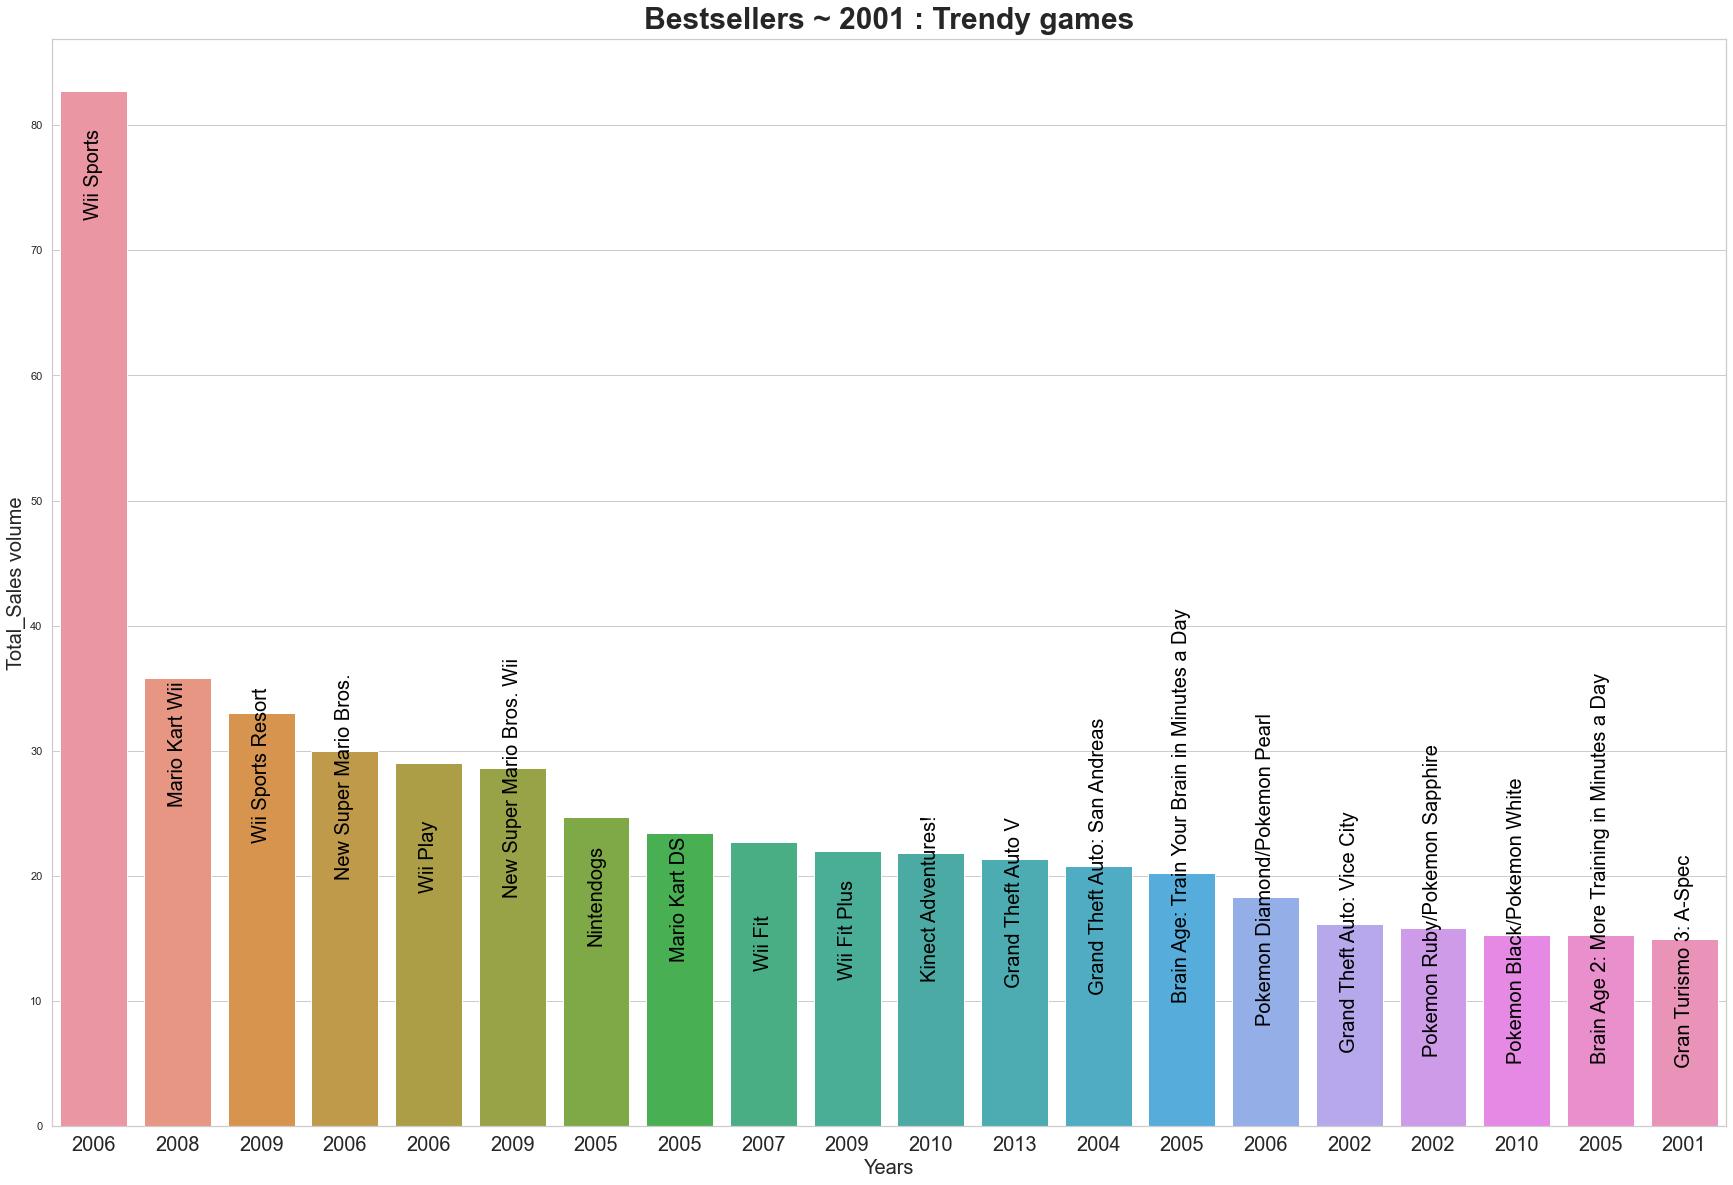

In [24]:
#최신 출시 게임 중 판매량이 높은 상위 20개 Game의 시각화

Name = df_Bestseller_Game['Name'].head(20)
Year = df_Bestseller_Game['Year'].head(20)
y = np.arange(0,20)

plt.figure(figsize = (30, 20))
Plot_Game2 = sns.barplot(x = 'Name', y = 'Total_Sales', data = df_Bestseller_Game)
index = 0
for i in df_Bestseller_Game['Total_Sales'] :
    Plot_Game2.text(index, i - 10, Name[index], color = '#000', size = 20, rotation = 90, ha = 'center')
    index += 1

plt.xticks(y, df_Bestseller_Game['Year'], fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Total_Sales volume', fontsize = 20)
plt.title('Bestsellers ~ 2001 : Trendy games', fontsize = 30, fontweight = 'bold', pad = 10)

plt.show()

In [25]:
#위의 두 Data set간 중복되는 Data, 즉, 최신 Trend가 반영된 판매량이 높은 게임의 판매량순 정렬

df_Bestseller = pd.merge(df_Bestseller_Year, df_Bestseller_Game)
df_Bestseller = df_Bestseller.sort_values(by = ['Total_Sales'], ascending = False)
df_Bestseller = df_Bestseller.reset_index(drop = True)

df_Bestseller

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Mario Kart Wii,2008,Racing,35.83
2,Wii Sports Resort,2009,Sports,33.00
3,New Super Mario Bros.,2006,Platform,30.01
4,Wii Play,2006,Misc,29.01
5,New Super Mario Bros. Wii,2009,Platform,28.61
6,Nintendogs,2005,Simulation,24.75
7,Mario Kart DS,2005,Racing,23.43
8,Wii Fit,2007,Sports,22.72
9,Wii Fit Plus,2009,Sports,22.00


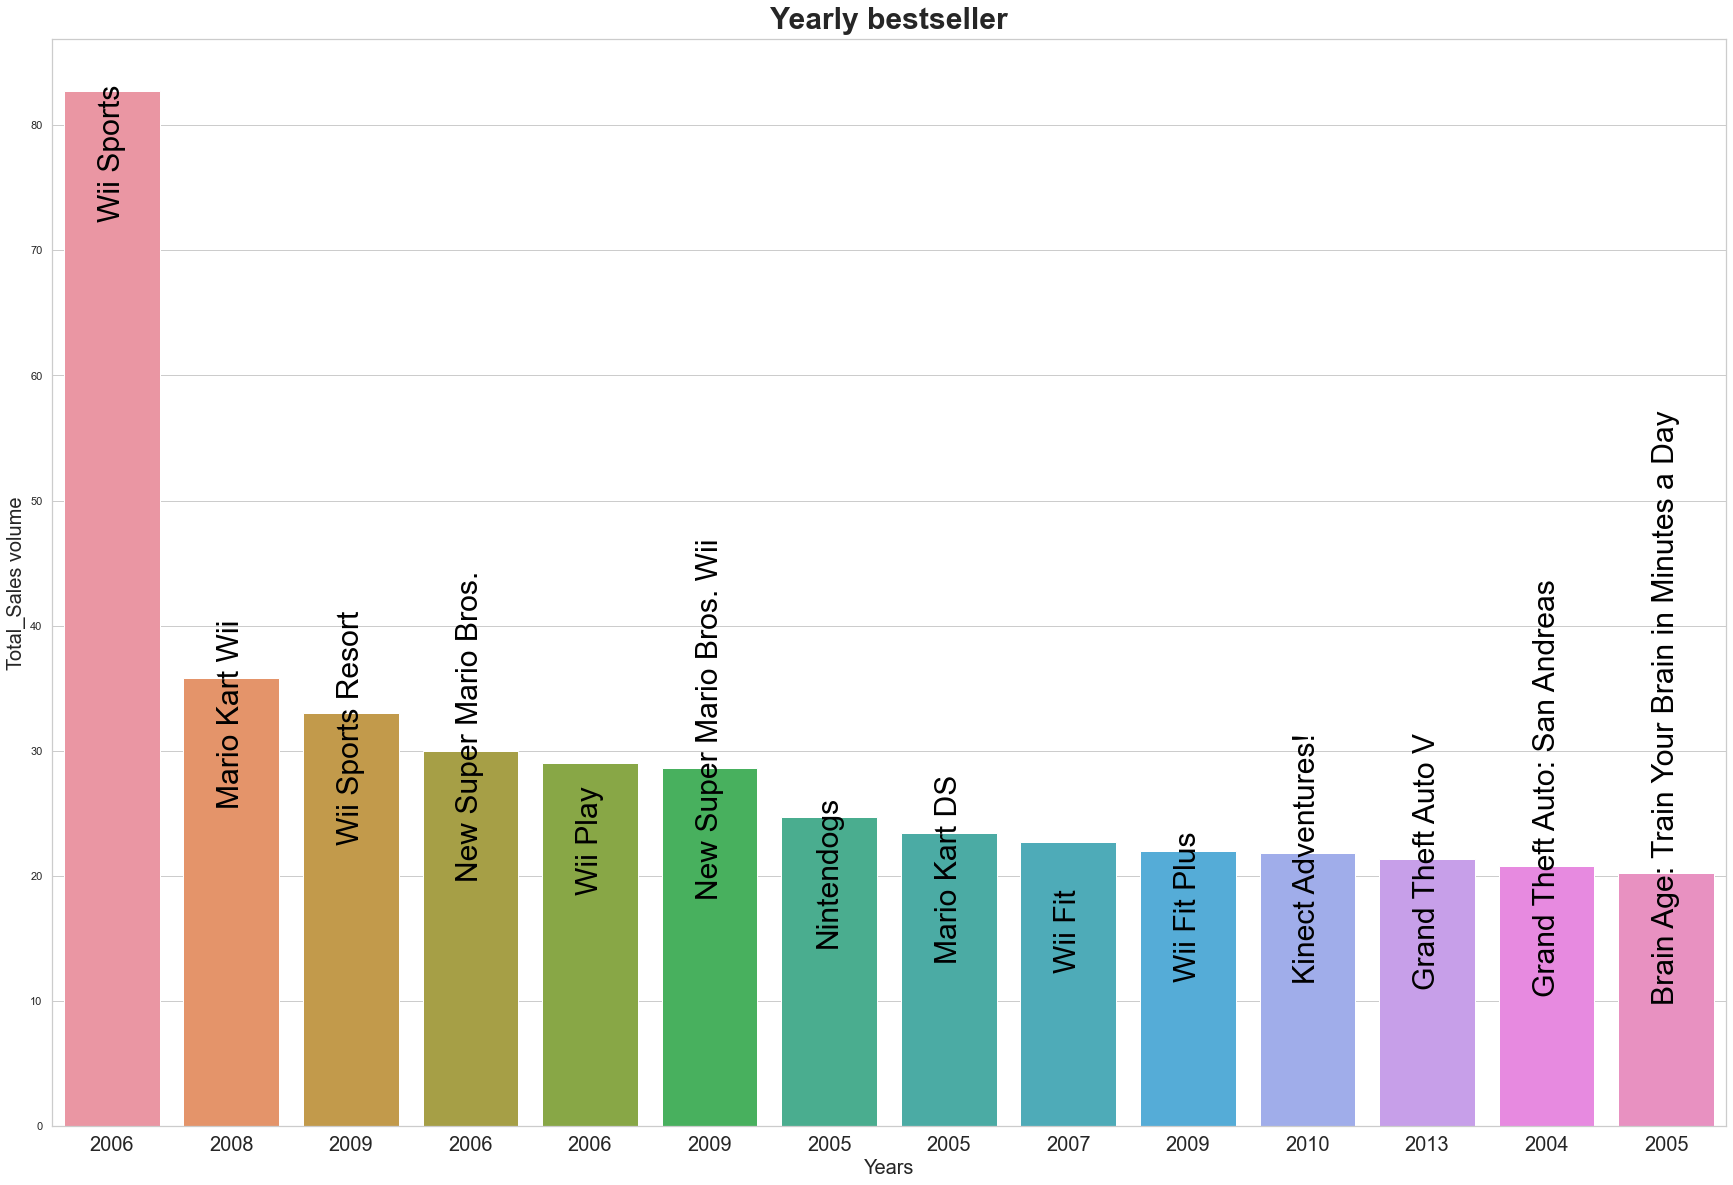

In [26]:
#시각화

Name = df_Bestseller['Name']
Year = df_Bestseller['Year']
y = np.arange(0,14)

plt.figure(figsize = (30, 20))
Plot_Game3 = sns.barplot(x = 'Name', y = 'Total_Sales', data = df_Bestseller)
index = 0
for i in df_Bestseller['Total_Sales'] :
    Plot_Game3.text(index, i - 10, Name[index], color = '#000', size = 30, rotation = 90, ha = 'center')
    index += 1

plt.xticks(y, df_Bestseller['Year'], fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Total_Sales volume', fontsize = 20)
plt.title('Yearly bestseller', fontsize = 30, fontweight = 'bold', pad = 10)

plt.show()

In [27]:
df_wii = df_Bestseller[df_Bestseller['Name'].str.contains('Wii')]

df_wii

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006,Sports,82.74
1,Mario Kart Wii,2008,Racing,35.83
2,Wii Sports Resort,2009,Sports,33.00
4,Wii Play,2006,Misc,29.01
5,New Super Mario Bros. Wii,2009,Platform,28.61
8,Wii Fit,2007,Sports,22.72
9,Wii Fit Plus,2009,Sports,22.00


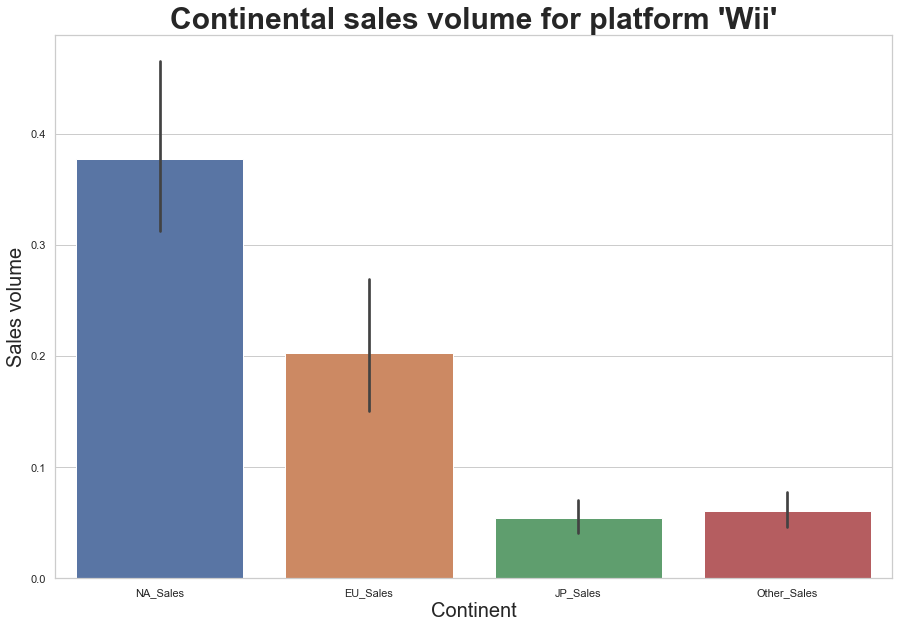

In [32]:
df_wii_con = df[df['Platform'].str.contains('Wii')]
df_wii_con = df_wii_con.drop(['Total_Sales'], axis = 1)
df_wii_con = df_wii_con.drop(['Year'], axis=1)

sns.set(style = 'whitegrid')
plt.figure(figsize = (15, 10))
plt.xlabel("Continent", fontsize = 20)
plt.ylabel("Sales volume", fontsize = 20)
plt.title("Continental sales volume for platform 'Wii'", fontsize=30, fontweight = 'bold')

sns.barplot(data = df_wii_con);

In [29]:
df_wii_Platform = pd.merge(df_wii, df)

df_wii_Platform

,Name,Year,Genre,Total_Sales,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,2006,Sports,82.74,Wii,Nintendo,41.49,29.02,3.77,8.46
1,Mario Kart Wii,2008,Racing,35.83,Wii,Nintendo,15.85,12.88,3.79,3.31
2,Wii Sports Resort,2009,Sports,33.00,Wii,Nintendo,15.75,11.01,3.28,2.96
3,Wii Play,2006,Misc,29.01,Wii,Nintendo,14.03,9.20,2.93,2.85
4,New Super Mario Bros. Wii,2009,Platform,28.61,Wii,Nintendo,14.59,7.06,4.70,2.26
5,Wii Fit,2007,Sports,22.72,Wii,Nintendo,8.94,8.03,3.60,2.15
6,Wii Fit Plus,2009,Sports,22.00,Wii,Nintendo,9.09,8.59,2.53,1.79
